# Posttest 6 - Unsupervised Learning

Muhammad Rizky Hari Nugroho (2009106141)

# Import Library

In [227]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, complete
from sklearn.cluster import AgglomerativeClustering

# Baca File CSV

In [228]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Cek Nilai Null

In [229]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Cek Duplikat

In [230]:
df.duplicated().sum()

0

# Visualisasi Data menggunkan Scatterplot

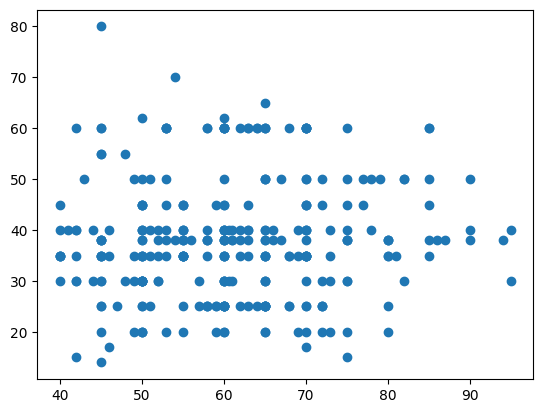

In [231]:
points = df[['age', 'ejection_fraction']]

plt.scatter(points['age'],points['ejection_fraction'])
plt.show()

# Algoritma KMeans Clustering

In [232]:
model = KMeans(n_clusters=2)

model.fit(points)

KMeans(n_clusters=2)

In [233]:
labels = model.labels_
labels

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [234]:
df_kmeans = pd.DataFrame({
    'labels': labels,
    'target': df.DEATH_EVENT
})

In [235]:
crosstab = pd.crosstab(df_kmeans['labels'], df_kmeans['target'])
crosstab

target,0,1
labels,,
0,67,33
1,136,63


Menentukan Centroid

In [236]:
centroid = model.cluster_centers_
centroid

array([[68.82      , 49.8       ],
       [56.82077387, 32.1959799 ]])

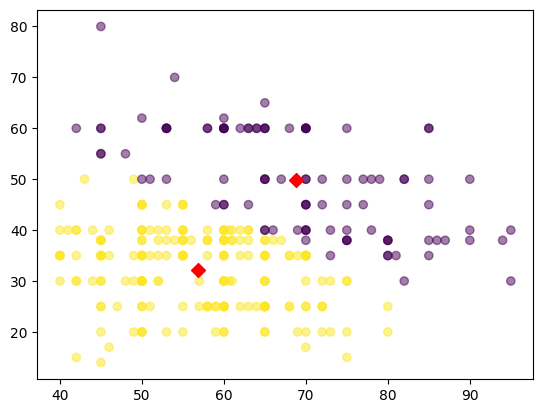

In [237]:
plt.scatter(points['age'],points['ejection_fraction'], alpha=.5, c=labels)
plt.scatter(centroid[:,0],centroid[:,1], marker='D',  s=50, color='red')
plt.show()

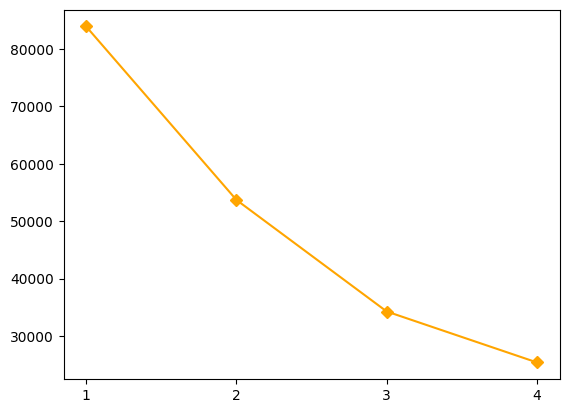

In [238]:
cluster_sum = range(1,5)
inertia = []

for cluster in cluster_sum:
    model = KMeans(n_clusters=cluster)
    model.fit(points)
    inertia.append(model.inertia_)

plt.plot(cluster_sum, inertia, '-D', color='orange')
plt.xticks(cluster_sum)
plt.show()

# Hierarchical Clustering

In [239]:
points_linkage = df.iloc[:,[2,5]].values#: = semua baris dan colomn dari 2 smpe 5
points_complete = df.iloc[:,[2,6]].values

Menentukan algoritma similarity yang digunakan

In [240]:
hr_linkage = linkage(points_linkage, method='ward')
hr_complete = complete(points_complete)

Text(0.5, 0, 'distance')

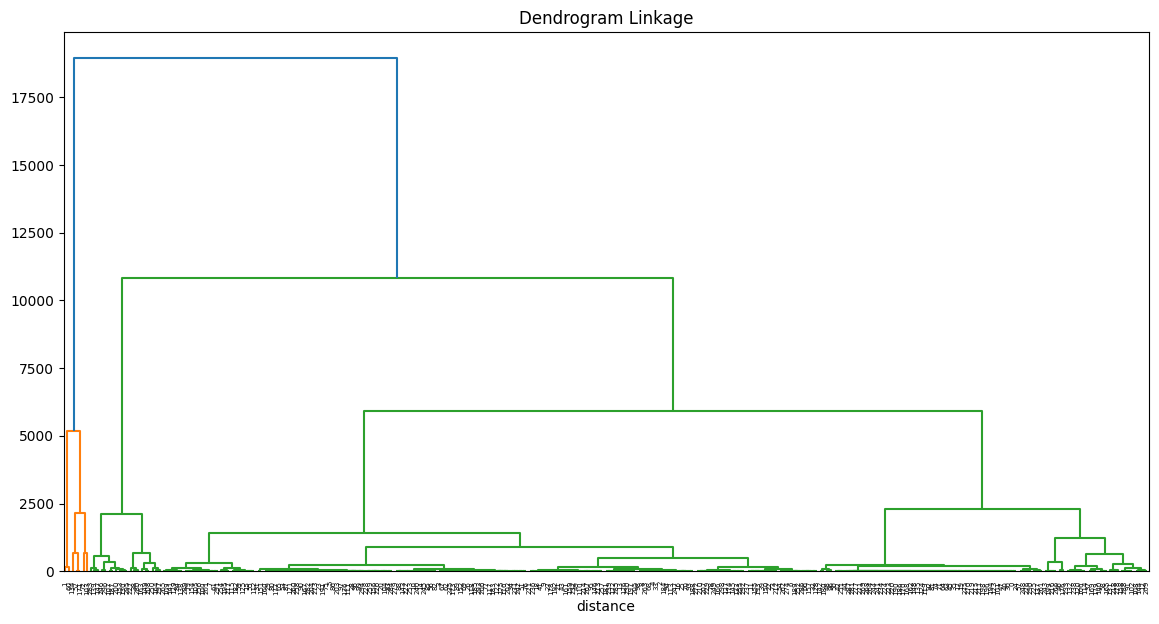

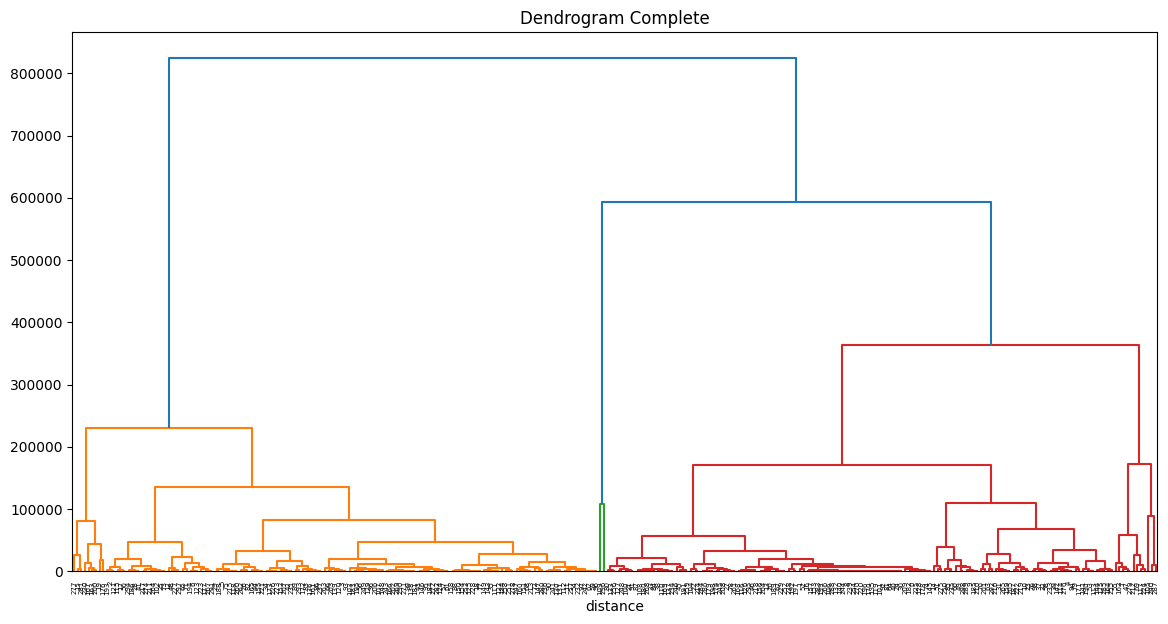

In [241]:
plt.figure(1, figsize=(14,7))
dendrogram(hr_linkage)
plt.title('Dendrogram Linkage')
plt.xlabel('data')
plt.xlabel('distance')

plt.figure(2, figsize=(14,7))
dendrogram(hr_complete)
plt.title('Dendrogram Complete')
plt.xlabel('data')
plt.xlabel('distance')

In [242]:
ag_linkage =  AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ag_complete =  AgglomerativeClustering(n_clusters=3, affinity='euclidean')

In [243]:
pr_linkage = ag_linkage.fit_predict(points_linkage)
pr_complete = ag_complete.fit_predict(points_complete)

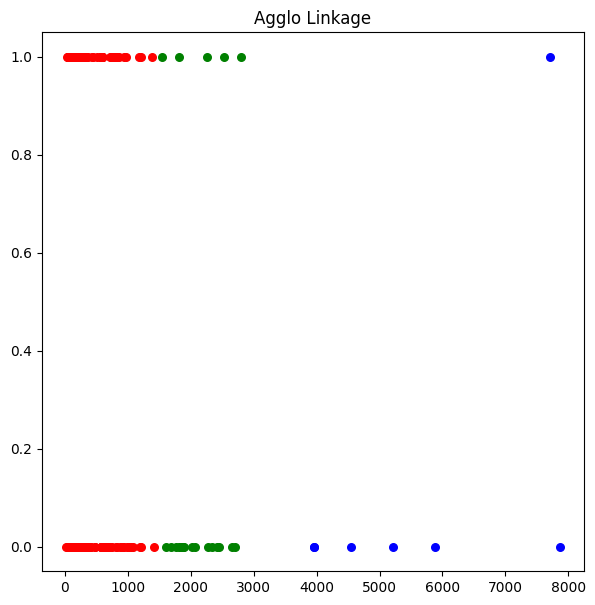

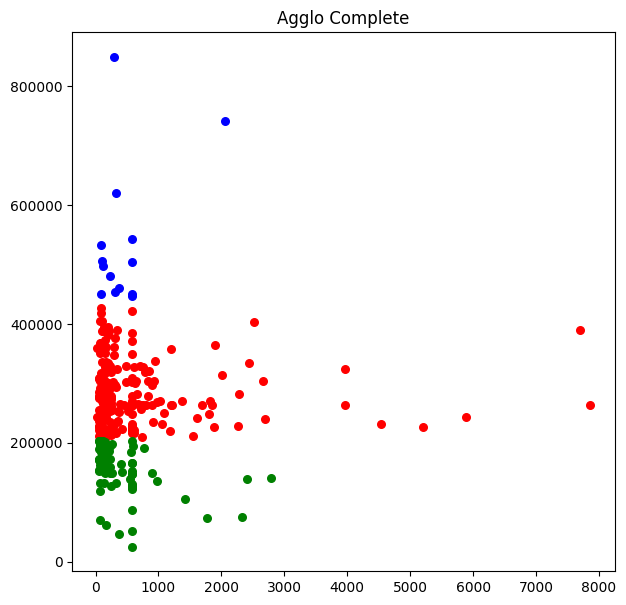

In [244]:
plt.figure(1, figsize=(7,7))
plt.scatter(points_linkage[pr_linkage==0.,0], points_linkage[pr_linkage==0.,1], s = 30, c = 'red')
plt.scatter(points_linkage[pr_linkage==1.,0], points_linkage[pr_linkage==1.,1], s = 30, c = 'blue')
plt.scatter(points_linkage[pr_linkage==2.,0], points_linkage[pr_linkage==2.,1], s = 30, c = 'green')
plt.title('Agglo Linkage')

plt.figure(2, figsize=(7,7))
plt.scatter(points_complete[pr_complete==0.,0], points_complete[pr_complete==0.,1], s = 30, c = 'red')
plt.scatter(points_complete[pr_complete==1.,0], points_complete[pr_complete==1.,1], s = 30, c = 'blue')
plt.scatter(points_complete[pr_complete==2.,0], points_complete[pr_complete==2.,1], s = 30, c = 'green')
plt.title('Agglo Complete')

plt.show()